# Investigate ZCA Whitenning

In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import kornia as K
import numpy as np
import matplotlib.pyplot as plt

In [3]:
traindir = 'data/imagenet/train'


transform = transforms.Compose([
    transforms.Resize(256),  # Resize images to 256x256
    transforms.CenterCrop(224),  # Crop the center 224x224
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize with ImageNet stats
                         std=[0.229, 0.224, 0.225])
])


train_dataset = datasets.ImageFolder(
        traindir,
        transform = transform
    )

In [5]:
transform_tiny = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
])

tiny_imgnet = datasets.ImageFolder(
        "data/tiny-imagenet-200/train",
        transform = transform_tiny)

In [6]:
tiny_loader = torch.utils.data.DataLoader(tiny_imgnet, batch_size=64, shuffle=True)

In [22]:
x,y = next(iter(tiny_imgnet))

In [23]:
y

0

In [7]:
# Collect all images in a numpy array
all_images = []
for images, _ in tiny_loader:
    all_images.append(images)
all_images = torch.cat(all_images, dim=0)

# Compute ZCA whitening matrix
#whitening_matrix = compute_zca_whitening_matrix(all_images)

In [18]:
all_images.shape

torch.Size([100000, 3, 64, 64])

In [10]:
zca = K.enhance.ZCAWhitening(eps=0.1, compute_inv=True)
zca.fit(all_images)
#zca_images = zca(all_images)
#print(zca_images.shape)
#print(zca_images[0].max(), zca_images[0].min())
# save zca images
#torch.save(zca_images, "tiny-imagenet-200/zca_images.pt")

ZCAWhitening()

In [12]:
torch.save(zca.state_dict(), "data/tiny-imagenet-200/zca_model.pt")

In [30]:
zca.mean_vector

tensor([[0.4757, 0.4767, 0.4789,  ..., 0.3823, 0.3830, 0.3824]])

In [33]:
torch.save({
    'transform_matrix': zca.transform_matrix,
    'transform_inv': zca.transform_inv,
    'mean_vector': zca.mean_vector, 
    'fitted': True,
}, 'data/tiny-imagenet-200/zca_model.pt')

In [15]:
x,y = next(iter(tiny_imgnet))
print(x.shape)

torch.Size([3, 64, 64])


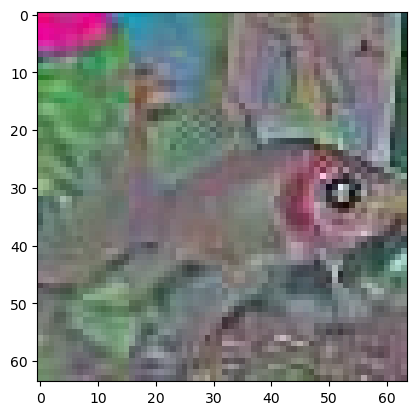

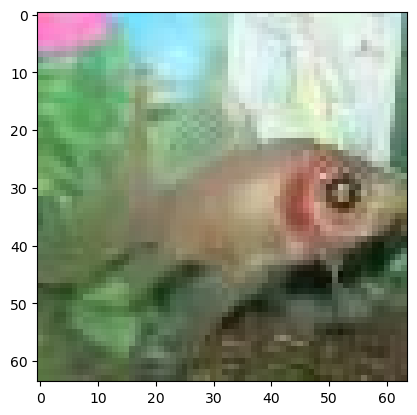

In [21]:
zca_img = zca(x[None, ...])
zca_img = zca_img[0].permute(1,2,0)
zca_img = (zca_img - zca_img.min()) / (zca_img.max() - zca_img.min())
plt.imshow(zca_img)
plt.show()

img = x.permute(1,2,0)
img = (img - img.min()) / (img.max() - img.min())
plt.imshow(img)
plt.show()

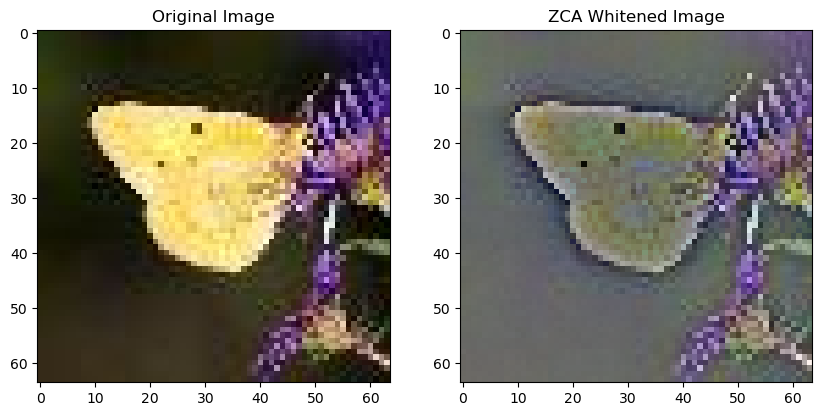

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
idx = np.random.randint(0, len(all_images))
ax[0].imshow(all_images[idx].permute(1, 2, 0))
ax[0].set_title('Original Image')
zca_image = zca_images[idx]
# normalize zca
zca_image = (zca_image - zca_image.min())/(zca_image.max() - zca_image.min())
ax[1].imshow(zca_image.permute(1, 2, 0))
ax[1].set_title('ZCA Whitened Image')
plt.show()